# Compute the metrics for DAG based models: 
### A. TropiGAT
### B. TropiSAGE
***

> Importations :
    

In [ ]:
rsync -avzhe ssh \
conchae@garnatxa.srv.cpd:/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/ficheros_28032023/train_nn/TropiGAT_ensemble_27_11_2024_log \
/media/concha-eloko/Linux/PPT_clean/reviewed_models

rsync -avzhe ssh \
conchae@garnatxa.srv.cpd:/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/ficheros_28032023/train_nn/TropiGAT_ensemble_ultraF_27_11_2024_log \
/media/concha-eloko/Linux/PPT_clean/reviewed_models

rsync -avzhe ssh \
conchae@garnatxa.srv.cpd:/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/ficheros_28032023/train_nn/TropiSAGE_ensemble_27_11_2024_log \
/media/concha-eloko/Linux/PPT_clean/reviewed_models

rsync -avzhe ssh \
conchae@garnatxa.srv.cpd:/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/ficheros_28032023/train_nn/TropiSAGE_ensemble_ultraF_27_11_2024_log \
/media/concha-eloko/Linux/PPT_clean/reviewed_models

> Relevant functions: 

In [11]:
def make_table(log_file) :
    import pandas as pd
    lines_data = [line for line in open(log_file).read().split("\n") if line[0:6] == "Epoch:" if len(line.split("\t")) == 6] # if len(line.split("\t")) == 6*
    lines_split = [line.split("\t") for line in lines_data]
    df_raw = pd.DataFrame(lines_split , columns = ["Epoch","Train_loss","Test_loss","MCC","AUC","Acc"])
    df = df_raw.applymap(lambda x: float(x.split(":")[1]))
    df.set_index("Epoch", inplace = True)
    return df
    
def plot_loss(df) : 
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['Train_loss'], label='train loss', marker='o', linestyle='-', color ="red")
    plt.plot(df.index, df['Test_loss'], label='test loss', marker='s', linestyle='--', color = "blue")
    plt.title('Loss over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)   
    plt.show()  
    

### A. TropiGAT

In [23]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

path_metrics = "/media/concha-eloko/Linux/PPT_clean/reviewed_models"

path_tropigat_uf = f"{path_metrics}/TropiGAT_ensemble_ultraF_27_11_2024_log"
path_tropigat = f"{path_metrics}/TropiGAT_ensemble_27_11_2024_log"

> Regular filtration: 

In [2]:
# Open the data frame
metrics_names = ["KL_type" , "n_prophages", "F1_score", "precision" , "recall", "MCC", "Accuracy", "AUC"]
df_metrics = pd.read_csv(f"{path_tropigat}/Metric_Report.27_11_2024.tsv", sep = "\t", names = metrics_names)
df_metrics = df_metrics.drop_duplicates(subset = ["KL_type"], keep = "last")
df_metrics_sorted = df_metrics.sort_values(by='KL_type', key=lambda x: x.str.split("KL").str[1].str.split("__").str[0].astype(int))
df_metrics_sorted.reset_index(drop=True, inplace=True)

# Add the KL_clean column : 
df_metrics_sorted["KL_clean"] = df_metrics_sorted["KL_type"].apply(lambda x : x.split("__")[0])
df_metrics_sorted['F1_score'] = df_metrics_sorted['F1_score'].astype(float)

average_metrics = []

for kltype in df_metrics_sorted["KL_clean"].unique().tolist() :
    df_kl = df_metrics_sorted[df_metrics_sorted["KL_clean"] == kltype]
    # get the optimum version :  
    max_mcc_index = df_kl['MCC'].idxmax()
    v_model = df_kl.loc[max_mcc_index, 'KL_type']
    # get the average metrics :
    av_f1 = np.round(np.mean(df_kl["F1_score"].values), 4)
    av_preci = np.round(np.mean(df_kl["precision"].values), 4)
    av_recall = np.round(np.mean(df_kl["recall"].values), 4)
    av_mcc = np.round(np.mean(df_kl["MCC"].values), 4)
    av_acc = np.round(np.mean(df_kl["Accuracy"].values), 4)
    av_auc = np.round(np.mean(df_kl["AUC"].values), 4)
    # make the line :
    line = [kltype, v_model ,df_kl["n_prophages"].values[0], av_preci, av_recall, av_acc, av_f1, av_auc, av_mcc]
    average_metrics.append(line)

names_col = ["KL_type","model_version","n_prophages","precision","recall","Accuracy","F1_score","AUC","MCC"]
average_metric_df = pd.DataFrame(average_metrics, columns = names_col)
average_metric_df.to_csv(f"/media/concha-eloko/Linux/PPT_clean/ficheros_28032023/Metric_Report.review.GAT.F.tsv", sep = "\t", index = False, header = True)

average_metric_df

,KL_type,model_version,n_prophages,precision,recall,Accuracy,F1_score,AUC,MCC
0,KL1,KL1__4,190,0.8537,0.5473,0.9105,0.6428,0.8888,0.6295
1,KL2,KL2__3,351,0.9384,0.7486,0.9495,0.8323,0.9697,0.8104
2,KL3,KL3__5,145,0.8362,0.9857,0.9651,0.9034,0.9857,0.8879
3,KL4,KL4__5,13,0.2000,0.4000,0.8000,0.2667,0.8000,0.1915
4,KL5,KL5__4,28,0.7800,0.7000,0.9000,0.6476,0.8072,0.6529
...,...,...,...,...,...,...,...,...,...
87,KL153,KL153__4,18,0.3000,0.4000,0.8400,0.3333,0.5556,0.2556
88,KL155,KL155__2,13,0.4000,0.4000,0.8857,0.4000,0.9667,0.3667
89,KL157,KL157__4,13,0.5000,0.6000,0.8286,0.5333,0.7667,0.4441
90,KL166,KL166__3,10,0.2000,0.2000,0.7333,0.2000,0.7200,0.0735


> Ultrafiltration:

In [3]:
# Open the data frame
metrics_names = ["KL_type" , "n_prophages", "F1_score", "precision" , "recall", "MCC", "Accuracy", "AUC"]
df_metrics = pd.read_csv(f"{path_tropigat_uf}/Metric_Report.27_11_2024.tsv", sep = "\t", names = metrics_names)
df_metrics = df_metrics.drop_duplicates(subset = ["KL_type"], keep = "last")
df_metrics_sorted = df_metrics.sort_values(by='KL_type', key=lambda x: x.str.split("KL").str[1].str.split("__").str[0].astype(int))
df_metrics_sorted.reset_index(drop=True, inplace=True)

# Add the KL_clean column : 
df_metrics_sorted["KL_clean"] = df_metrics_sorted["KL_type"].apply(lambda x : x.split("__")[0])
df_metrics_sorted['F1_score'] = df_metrics_sorted['F1_score'].astype(float)

average_metrics = []

for kltype in df_metrics_sorted["KL_clean"].unique().tolist() :
    df_kl = df_metrics_sorted[df_metrics_sorted["KL_clean"] == kltype]
    # get the optimum version :  
    max_mcc_index = df_kl['MCC'].idxmax()
    v_model = df_kl.loc[max_mcc_index, 'KL_type']
    # get the average metrics :
    av_f1 = np.round(np.mean(df_kl["F1_score"].values), 4)
    av_preci = np.round(np.mean(df_kl["precision"].values), 4)
    av_recall = np.round(np.mean(df_kl["recall"].values), 4)
    av_mcc = np.round(np.mean(df_kl["MCC"].values), 4)
    av_acc = np.round(np.mean(df_kl["Accuracy"].values), 4)
    av_auc = np.round(np.mean(df_kl["AUC"].values), 4)
    # make the line :
    line = [kltype, v_model ,df_kl["n_prophages"].values[0], av_preci, av_recall, av_acc, av_f1, av_auc, av_mcc]
    average_metrics.append(line)

names_col = ["KL_type","model_version","n_prophages","precision","recall","Accuracy","F1_score","AUC","MCC"]
average_metric_df = pd.DataFrame(average_metrics, columns = names_col)
average_metric_df.to_csv(f"/media/concha-eloko/Linux/PPT_clean/ficheros_28032023/Metric_Report.review.GAT.UF.tsv", sep = "\t", index = False, header = True)

UF_tropigat = average_metric_df

In [4]:
# UF_tropigat.sort_values(by='MCC', ascending=False).to_csv(f"/media/concha-eloko/Linux/PPT_clean/ficheros_28032023/Metric_Report.review.GAT.UF.ordered.tsv", sep = "\t", index = False, header = True)
UF_tropigat.sort_values(by='MCC', ascending=True)

,KL_type,model_version,n_prophages,precision,recall,Accuracy,F1_score,AUC,MCC
29,KL31,KL31__4,11,0.0000,0.0000,0.6667,0.0000,0.4800,-0.1832
5,KL6,KL6__1,11,0.0000,0.0000,0.7333,0.0000,0.6000,-0.1032
8,KL9,KL9__3,18,0.0000,0.0000,0.8400,0.0000,0.6444,-0.0436
56,KL103,KL103__3,11,0.0000,0.0000,0.8000,0.0000,0.7600,-0.0400
43,KL55,KL55__4,17,0.0667,0.2000,0.7778,0.1000,0.7000,0.0122
...,...,...,...,...,...,...,...,...,...
44,KL56,KL56__2,13,0.7000,1.0000,0.9143,0.8000,0.9333,0.7873
2,KL3,KL3__5,90,0.8292,0.8445,0.9444,0.8299,0.9531,0.8019
55,KL102,KL102__5,111,0.8570,0.8182,0.9454,0.8323,0.9504,0.8034
20,KL22,KL22__4,43,0.8643,0.8500,0.9440,0.8288,0.9238,0.8156


In [8]:
n_uf = sum(UF_tropigat["n_prophages"])
weighted_mcc_tropigat = [] 
for _, row in UF_tropigat.iterrows() : 
    w_mcc = row["MCC"] * row["n_prophages"] / n_uf
    weighted_mcc_tropigat.append(w_mcc)

MCC_weigth_tropigat = sum(weighted_mcc_tropigat)
MCC_weigth_tropigat


0.5468401081081082

***
### B. TropiSAGE

In [6]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

path_metrics = "/media/concha-eloko/Linux/PPT_clean/reviewed_models"

path_tropisage_uf = f"{path_metrics}/TropiSAGE_ensemble_ultraF_27_11_2024_log"
path_tropisage = f"{path_metrics}/TropiSAGE_ensemble_27_11_2024_log"

> Regular filtration: 

In [15]:
# Open the data frame
metrics_names = ["KL_type" , "n_prophages", "F1_score", "precision" , "recall", "MCC", "Accuracy", "AUC"]
df_metrics = pd.read_csv(f"{path_tropisage}/Metric_Report.27_11_2024.tsv", sep = "\t", names = metrics_names)
df_metrics = df_metrics.drop_duplicates(subset = ["KL_type"], keep = "last")
df_metrics_sorted = df_metrics.sort_values(by='KL_type', key=lambda x: x.str.split("KL").str[1].str.split("__").str[0].astype(int))
df_metrics_sorted.reset_index(drop=True, inplace=True)

# Add the KL_clean column : 
df_metrics_sorted["KL_clean"] = df_metrics_sorted["KL_type"].apply(lambda x : x.split("__")[0])
df_metrics_sorted['F1_score'] = df_metrics_sorted['F1_score'].astype(float)

average_metrics = []

for kltype in df_metrics_sorted["KL_clean"].unique().tolist() :
    df_kl = df_metrics_sorted[df_metrics_sorted["KL_clean"] == kltype]
    # get the optimum version :  
    max_mcc_index = df_kl['MCC'].idxmax()
    v_model = df_kl.loc[max_mcc_index, 'KL_type']
    # get the average metrics :
    av_f1 = np.round(np.mean(df_kl["F1_score"].values), 4)
    av_preci = np.round(np.mean(df_kl["precision"].values), 4)
    av_recall = np.round(np.mean(df_kl["recall"].values), 4)
    av_mcc = np.round(np.mean(df_kl["MCC"].values), 4)
    av_acc = np.round(np.mean(df_kl["Accuracy"].values), 4)
    av_auc = np.round(np.mean(df_kl["AUC"].values), 4)
    # make the line :
    line = [kltype, v_model ,df_kl["n_prophages"].values[0], av_preci, av_recall, av_acc, av_f1, av_auc, av_mcc]
    average_metrics.append(line)

names_col = ["KL_type","model_version","n_prophages","precision","recall","Accuracy","F1_score","AUC","MCC"]
average_metric_df = pd.DataFrame(average_metrics, columns = names_col)
average_metric_df.to_csv(f"/media/concha-eloko/Linux/PPT_clean/ficheros_28032023/Metric_Report.review.SAGE.F.tsv", sep = "\t", index = False, header = True)

average_metric_df

,KL_type,model_version,n_prophages,precision,recall,Accuracy,F1_score,AUC,MCC
0,KL1,KL1__4,190,0.8853,0.7895,0.9474,0.8338,0.8871,0.8051
1,KL2,KL2__4,351,0.9162,0.8743,0.9657,0.8946,0.9616,0.8746
2,KL3,KL3__5,145,0.9349,0.9572,0.9814,0.9448,0.9974,0.9345
3,KL4,KL4__5,13,0.2000,0.4000,0.8571,0.2667,0.8666,0.2582
4,KL5,KL5__4,28,0.6000,0.8000,0.8875,0.6334,0.8572,0.6152
...,...,...,...,...,...,...,...,...,...
87,KL153,KL153__4,18,0.1167,0.4000,0.7200,0.1800,0.4444,0.0843
88,KL155,KL155__2,13,0.7000,0.8000,0.9143,0.7333,0.9000,0.6958
89,KL157,KL157__4,13,0.5000,0.8000,0.8571,0.6000,0.8000,0.5540
90,KL166,KL166__3,10,0.2333,0.6000,0.6667,0.3333,0.6400,0.2021


> Ultrafiltration:

In [7]:
# Open the data frame
metrics_names = ["KL_type" , "n_prophages", "F1_score", "precision" , "recall", "MCC", "Accuracy", "AUC"]
df_metrics = pd.read_csv(f"{path_tropisage_uf}/Metric_Report.27_11_2024.tsv", sep = "\t", names = metrics_names)
df_metrics = df_metrics.drop_duplicates(subset = ["KL_type"], keep = "last")
df_metrics_sorted = df_metrics.sort_values(by='KL_type', key=lambda x: x.str.split("KL").str[1].str.split("__").str[0].astype(int))
df_metrics_sorted.reset_index(drop=True, inplace=True)

# Add the KL_clean column : 
df_metrics_sorted["KL_clean"] = df_metrics_sorted["KL_type"].apply(lambda x : x.split("__")[0])
df_metrics_sorted['F1_score'] = df_metrics_sorted['F1_score'].astype(float)

average_metrics = []

for kltype in df_metrics_sorted["KL_clean"].unique().tolist() :
    df_kl = df_metrics_sorted[df_metrics_sorted["KL_clean"] == kltype]
    # get the optimum version :  
    max_mcc_index = df_kl['MCC'].idxmax()
    v_model = df_kl.loc[max_mcc_index, 'KL_type']
    # get the average metrics :
    av_f1 = np.round(np.mean(df_kl["F1_score"].values), 4)
    av_preci = np.round(np.mean(df_kl["precision"].values), 4)
    av_recall = np.round(np.mean(df_kl["recall"].values), 4)
    av_mcc = np.round(np.mean(df_kl["MCC"].values), 4)
    av_acc = np.round(np.mean(df_kl["Accuracy"].values), 4)
    av_auc = np.round(np.mean(df_kl["AUC"].values), 4)
    # make the line :
    line = [kltype, v_model ,df_kl["n_prophages"].values[0], av_preci, av_recall, av_acc, av_f1, av_auc, av_mcc]
    average_metrics.append(line)

names_col = ["KL_type","model_version","n_prophages","precision","recall","Accuracy","F1_score","AUC","MCC"]
average_metric_df = pd.DataFrame(average_metrics, columns = names_col)
average_metric_df.to_csv(f"/media/concha-eloko/Linux/PPT_clean/ficheros_28032023/Metric_Report.review.SAGE.UF.tsv", sep = "\t", index = False, header = True)

UF_tropisage = average_metric_df

In [13]:
n_uf = sum(UF_tropisage["n_prophages"])
weighted_mcc_tropisage = [] 
for _, row in UF_tropisage.iterrows() : 
    w_mcc = row["MCC"] * row["n_prophages"] / n_uf
    weighted_mcc_tropisage.append(w_mcc)

MCC_weigth_tropisage = sum(weighted_mcc_tropisage)
MCC_weigth_tropisage

0.5277113783783783

***
### Weighted MCC and P-value:  

In [ ]:
# TropiGAT : 
n_uf = sum(UF_tropigat["n_prophages"])
weighted_mcc_tropigat = [] 
for _, row in UF_tropigat.iterrows() : 
    w_mcc = row["MCC"] * row["n_prophages"] / n_uf
    weighted_mcc_tropigat.append(w_mcc)

MCC_weigth_tropigat = sum(weighted_mcc_tropigat)
MCC_weigth_tropigat

# TropiSAGE : 
n_uf = sum(UF_tropisage["n_prophages"])
weighted_mcc_tropisage = [] 
for _, row in UF_tropisage.iterrows() : 
    w_mcc = row["MCC"] * row["n_prophages"] / n_uf
    weighted_mcc_tropisage.append(w_mcc)

MCC_weigth_tropisage = sum(weighted_mcc_tropisage)
MCC_weigth_tropisage



In [14]:
import numpy as np
import scipy.stats as stats

# Assuming you already have the following lists of weighted MCC values:
# weighted_mcc_tropigat and weighted_mcc_tropisage

# Compute the variances of the two groups
var_tropigat = np.var(weighted_mcc_tropigat, ddof=1)  # ddof=1 for sample variance
var_tropisage = np.var(weighted_mcc_tropisage, ddof=1)

# Perform the F-test
f_stat = var_tropigat / var_tropisage
df1 = len(weighted_mcc_tropigat) - 1  # Degrees of freedom for TropiGAT
df2 = len(weighted_mcc_tropisage) - 1  # Degrees of freedom for TropiSAGE

# Two-tailed p-value from the F-distribution
p_value = 2 * min(
    stats.f.cdf(f_stat, df1, df2), 
    1 - stats.f.cdf(f_stat, df1, df2)
)

# Display the results
print(f"F-statistic: {f_stat}")
print(f"Degrees of Freedom: df1 = {df1}, df2 = {df2}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The variances are significantly different (reject H0).")
else:
    print("The variances are not significantly different (fail to reject H0).")

F-statistic: 1.0911656291380998
Degrees of Freedom: df1 = 84, df2 = 84
P-value: 0.6902155166323276
The variances are not significantly different (fail to reject H0).


In [15]:
if len(weighted_mcc_tropigat) != len(weighted_mcc_tropisage):
    raise ValueError("The two groups must have the same number of models for a paired t-test.")

# Compute the paired t-test
t_stat, p_value = stats.ttest_rel(weighted_mcc_tropigat, weighted_mcc_tropisage)

# Display the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the two ensembles (reject H0).")
else:
    print("There is no significant difference between the two ensembles (fail to reject H0).")


T-statistic: 2.0090322708830795
P-value: 0.04774511095121014
There is a significant difference between the two ensembles (reject H0).


***
### Compare metrics between each: 

In [2]:
def clean_print(dico) :
	""" 
	Inputs : a dico
	Outputs : pretty printed dico
	"""
	import pprint
	pp = pprint.PrettyPrinter(width = 150, sort_dicts = True, compact = True)
	out = pp.pprint(dico)
	return out 
        

In [3]:
UF_tropigat = pd.read_csv(f"/media/concha-eloko/Linux/PPT_clean/ficheros_28032023/Metric_Report.review.GAT.UF.tsv", sep = "\t", header = 0)
UF_tropisage = pd.read_csv(f"/media/concha-eloko/Linux/PPT_clean/ficheros_28032023/Metric_Report.review.SAGE.UF.tsv", sep = "\t", header = 0)

In [4]:
dico_compare_dag = {}
kltypes = UF_tropigat["KL_type"].tolist()
tropigat_mcc_list = UF_tropigat["MCC"].tolist()
tropisage_mcc_list = UF_tropisage["MCC"].tolist()


for kltype, tropigat_mcc, tropisage_mcc in zip(kltypes, tropigat_mcc_list, tropisage_mcc_list): 
    diff = tropigat_mcc - tropisage_mcc
    diff_litt = round(diff, 3)
    if diff > 0 :
        a = {"best_agg" : "TropiGAT", "best_value" : tropigat_mcc, "difference" : diff_litt}
    else :
        a = {"best_agg" : "TropiSAGE", "best_value" : tropigat_mcc, "difference" : -diff_litt}
    dico_compare_dag[kltype] = a

In [5]:
sage_best = {kltype: data for kltype,data in dico_compare_dag.items() if data["best_agg"] == "TropiSAGE"}
gat_best = {kltype: data for kltype,data in dico_compare_dag.items() if data["best_agg"] == "TropiGAT"}
sage_best

{'KL3': {'best_agg': 'TropiSAGE', 'best_value': 0.8019, 'difference': 0.027},
 'KL5': {'best_agg': 'TropiSAGE', 'best_value': 0.4898, 'difference': 0.072},
 'KL6': {'best_agg': 'TropiSAGE', 'best_value': -0.1032, 'difference': 0.077},
 'KL7': {'best_agg': 'TropiSAGE', 'best_value': 0.6914, 'difference': 0.05},
 'KL8': {'best_agg': 'TropiSAGE', 'best_value': 0.1564, 'difference': 0.193},
 'KL9': {'best_agg': 'TropiSAGE', 'best_value': -0.0436, 'difference': 0.181},
 'KL13': {'best_agg': 'TropiSAGE', 'best_value': 0.7663, 'difference': 0.009},
 'KL16': {'best_agg': 'TropiSAGE', 'best_value': 0.237, 'difference': 0.072},
 'KL18': {'best_agg': 'TropiSAGE', 'best_value': 0.3588, 'difference': 0.217},
 'KL19': {'best_agg': 'TropiSAGE', 'best_value': 0.2435, 'difference': 0.166},
 'KL20': {'best_agg': 'TropiSAGE', 'best_value': 0.1291, 'difference': 0.115},
 'KL21': {'best_agg': 'TropiSAGE', 'best_value': 0.2599, 'difference': 0.017},
 'KL25': {'best_agg': 'TropiSAGE', 'best_value': 0.6166, '

In [31]:
gat_best

{'KL1': {'best_agg': 'TropiGAT', 'best_value': 0.1946, 'difference': 0.0},
 'KL2': {'best_agg': 'TropiGAT', 'best_value': 0.5109, 'difference': 0.05},
 'KL4': {'best_agg': 'TropiGAT', 'best_value': 0.5884, 'difference': 0.211},
 'KL10': {'best_agg': 'TropiGAT', 'best_value': 0.3997, 'difference': 0.034},
 'KL12': {'best_agg': 'TropiGAT', 'best_value': 0.5935, 'difference': 0.043},
 'KL14': {'best_agg': 'TropiGAT', 'best_value': 0.6545, 'difference': 0.009},
 'KL15': {'best_agg': 'TropiGAT', 'best_value': 0.3505, 'difference': 0.005},
 'KL17': {'best_agg': 'TropiGAT', 'best_value': 0.8245, 'difference': 0.004},
 'KL22': {'best_agg': 'TropiGAT', 'best_value': 0.8156, 'difference': 0.074},
 'KL23': {'best_agg': 'TropiGAT', 'best_value': 0.569, 'difference': 0.067},
 'KL24': {'best_agg': 'TropiGAT', 'best_value': 0.4749, 'difference': 0.089},
 'KL28': {'best_agg': 'TropiGAT', 'best_value': 0.6756, 'difference': 0.039},
 'KL29': {'best_agg': 'TropiGAT', 'best_value': 0.6961, 'difference': 0

> See how many (absolute and proportion) the number of prophages with multiple depolymerases:

In [9]:
from tqdm import tqdm

path_work = "/media/concha-eloko/Linux/PPT_clean"

df_info = pd.read_csv(f"{path_work}/TropiGATv2.final_df_v2.tsv", sep = "\t" ,  header = 0)
df_prophages = df_info.drop_duplicates(subset = ["Phage"], keep = "first")
dico_prophage_info = {row["Phage"] : {"prophage_strain" : row["prophage_id"] , "ancestor" : row["Infected_ancestor"]} for _,row in df_prophages.iterrows()}


In [36]:
def filter_prophages(df_info, dico_prophage_info):
    """Filter prophages to remove duplicates and ensure diversity."""
    def get_filtered_prophages(prophage):
        combinations = []
        to_exclude = set()
        to_keep = set()
        to_keep.add(prophage)
        df_prophage_group = df_info[
            (df_info["prophage_id"] == dico_prophage_info[prophage]["prophage_strain"]) & 
            (df_info["Infected_ancestor"] == dico_prophage_info[prophage]["ancestor"])
        ]
        if len(df_prophage_group) == 1:
            return df_prophage_group, to_exclude, to_keep
        
        depo_set = set(df_prophage_group[df_prophage_group["Phage"] == prophage]["domain_seq"].values)
        for prophage_tmp in df_prophage_group["Phage"].unique():
            if prophage_tmp != prophage:
                tmp_depo_set = set(df_prophage_group[df_prophage_group["Phage"] == prophage_tmp]["domain_seq"].values)
                if depo_set == tmp_depo_set:
                    to_exclude.add(prophage_tmp)
                elif tmp_depo_set not in combinations:
                    to_keep.add(prophage_tmp)
                    combinations.append(tmp_depo_set)
                else:
                    to_exclude.add(prophage_tmp)
        return df_prophage_group, to_exclude, to_keep

    good_prophages = set()
    excluded_prophages = set()

    for prophage in tqdm(dico_prophage_info.keys()):
        if prophage not in excluded_prophages and prophage not in good_prophages:
            _, excluded_members, kept_members = get_filtered_prophages(prophage)
            good_prophages.update(kept_members)
            excluded_prophages.update(excluded_members)

    df_info_filtered = df_info[df_info["Phage"].isin(good_prophages)]
    df_info_final = df_info_filtered[~df_info_filtered["KL_type_LCA"].str.contains("\\|")]

    return df_info_final


def ultrafilter_prophages(df_info):
    """Perform ultra-filtration to remove duplicate prophages within KL types."""
    duplicate_prophage = []
    dico_kltype_duplica = {}

    for kltype in df_info["KL_type_LCA"].unique():
        df_kl = df_info[df_info["KL_type_LCA"] == kltype][["Phage", "Protein_name", "KL_type_LCA", "Infected_ancestor", "index", "seq", "domain_seq"]]
        prophages_tmp_list = df_kl["Phage"].unique().tolist()
        set_sets_depo = []
        duplicated = {}  
        for prophage_tmp in prophages_tmp_list: 
            set_depo = frozenset(df_kl[df_kl["Phage"] == prophage_tmp]["domain_seq"].values)
            for past_set in set_sets_depo:
                if past_set == set_depo:
                    duplicated[past_set] = duplicated.get(past_set, 0) + 1
                    duplicate_prophage.append(prophage_tmp)
                    break
            else:
                set_sets_depo.append(set_depo)
                duplicated[set_depo] = 1
        dico_kltype_duplica[kltype] = duplicated

    df_info_ultrafiltered = df_info[~df_info["Phage"].isin(duplicate_prophage)]
    return df_info_ultrafiltered

In [10]:
df_info_final = ultrafilter_prophages(filter_prophages(df_info, dico_prophage_info))

NameError: name 'ultrafilter_prophages' is not defined

In [7]:
def get_data_dpo(df_info_final, kltype) :
    df_interest = df_info_final[df_info_final["KL_type_LCA"] == kltype]
    n_depo = len(df_interest)
    n_diverse = len(df_interest["Phage"].unique())
    n_prophages = len(df_interest["Phage"].unique())
    ratio = n_depo / n_prophages
    
    return df_interest.sort_values(by='Phage', ascending=True), [ratio, n_depo,n_prophages] , f"{ratio=}, {n_depo=}, {n_prophages=}"

    

In [8]:
for kltype in sage_best :
    if sage_best[kltype]["difference"] >= 0.05 :
        df , ratio, text = get_data_dpo(df_info_final, kltype)
        p_ratio = ratio[0] * ratio[2]
        print(kltype, round(ratio[0], 4), ratio[2], sage_best[kltype]["difference"] , sep = "\t")

NameError: name 'df_info_final' is not defined

In [99]:
for kltype in gat_best :
    if gat_best[kltype]["difference"] >= 0.05 :
        df , ratio, text = get_data_dpo(df_info_final, kltype)
        p_ratio = ratio[0] * ratio[2]
        print(kltype, round(ratio[0], 4), ratio[2], gat_best[kltype]["difference"] , sep = "\t")

KL2	1.5408	98	0.05
KL4	1.4167	12	0.211
KL22	1.1628	43	0.074
KL23	1.6832	101	0.067
KL24	1.4917	120	0.089
KL29	1.5556	36	0.224
KL30	1.2222	63	0.053
KL34	1.0	16	0.321
KL38	1.5	52	0.086
KL47	1.6809	94	0.065
KL53	1.3714	35	0.155
KL57	1.5	36	0.115
KL63	1.2791	43	0.068
KL64	1.672	189	0.074
KL67	1.5455	11	0.063
KL70	1.6333	30	0.183
KL71	1.2143	14	0.126
KL81	1.5312	32	0.183
KL106	1.5957	94	0.102
KL109	1.2857	14	0.186
KL110	1.413	46	0.109
KL116	1.5	22	0.127
KL117	1.5385	13	0.179
KL123	1.6429	28	0.101
KL124	1.5	12	0.118
KL127	1.5312	32	0.114
KL140	1.6923	13	0.072
KL142	1.2857	14	0.267
KL153	1.375	16	0.223
KL155	1.3333	12	0.216


In [105]:
for kltype in sage_best :
    df , ratio, _ = get_data_dpo(df_info_final, kltype)
    print(kltype, _)

KL3 ratio=1.651685393258427, n_depo=147, n_prophages=89
KL5 ratio=1.0, n_depo=20, n_prophages=20
KL6 ratio=1.0909090909090908, n_depo=12, n_prophages=11
KL7 ratio=1.2580645161290323, n_depo=39, n_prophages=31
KL8 ratio=1.0666666666666667, n_depo=16, n_prophages=15
KL9 ratio=1.1666666666666667, n_depo=21, n_prophages=18
KL13 ratio=1.2881355932203389, n_depo=76, n_prophages=59
KL16 ratio=1.0833333333333333, n_depo=26, n_prophages=24
KL18 ratio=1.8095238095238095, n_depo=38, n_prophages=21
KL19 ratio=1.4791666666666667, n_depo=71, n_prophages=48
KL20 ratio=1.0833333333333333, n_depo=13, n_prophages=12
KL21 ratio=1.394736842105263, n_depo=53, n_prophages=38
KL25 ratio=1.6524822695035462, n_depo=233, n_prophages=141
KL26 ratio=1.5, n_depo=15, n_prophages=10
KL27 ratio=1.3793103448275863, n_depo=120, n_prophages=87
KL31 ratio=1.2727272727272727, n_depo=14, n_prophages=11
KL35 ratio=1.375, n_depo=22, n_prophages=16
KL36 ratio=1.5, n_depo=48, n_prophages=32
KL39 ratio=1.1904761904761905, n_dep

In [102]:
sage_n_depo = []
gat_n_depo = []


Index(['Phage', 'Protein_name', 'KL_type_LCA', 'Infected_ancestor', 'index',
       'Dataset', 'seq', 'domain_seq', '1', '2',
       ...
       '1272', '1273', '1274', '1275', '1276', '1277', '1278', '1279', '1280',
       'prophage_id'],
      dtype='object', length=1289)

***
# Plots 

### Plot MCC scores : 

In [26]:
PATH_WORK = "/media/concha-eloko/Linux/PPT_clean"

def load_data():
    df_info = pd.read_csv(f"{PATH_WORK}/TropiGATv2.final_df_v2.tsv", sep="\t", header=0)
    df_prophages = df_info.drop_duplicates(subset=["Phage"], keep="first")
    dico_prophage_info = {row["Phage"]: {"prophage_strain": row["prophage_id"], "ancestor": row["Infected_ancestor"]} for _, row in df_prophages.iterrows()}
    return df_info, dico_prophage_info


def get_filtered_prophages(prophage, df_info, dico_prophage_info):
    to_exclude = set()
    to_keep = {prophage}
    df_prophage_group = df_info[(df_info["prophage_id"] == dico_prophage_info[prophage]["prophage_strain"]) & 
                                (df_info["Infected_ancestor"] == dico_prophage_info[prophage]["ancestor"])]
    
    if len(df_prophage_group) > 1:
        depo_set = set(df_prophage_group[df_prophage_group["Phage"] == prophage]["domain_seq"].values)
        combinations = [depo_set]
        
        for prophage_tmp in df_prophage_group["Phage"].unique():
            if prophage_tmp != prophage:
                tmp_depo_set = set(df_prophage_group[df_prophage_group["Phage"] == prophage_tmp]["domain_seq"].values)
                if tmp_depo_set in combinations:
                    to_exclude.add(prophage_tmp)
                else:
                    to_keep.add(prophage_tmp)
                    combinations.append(tmp_depo_set)
    
    return df_prophage_group, to_exclude, to_keep

def filter_prophages(df_info, dico_prophage_info):
    good_prophages = set()
    excluded_prophages = set()
    for prophage in tqdm(dico_prophage_info.keys()):
        if prophage not in excluded_prophages and prophage not in good_prophages:
            _, excluded_members, kept_members = get_filtered_prophages(prophage, df_info, dico_prophage_info)
            good_prophages.update(kept_members)
            excluded_prophages.update(excluded_members)
    df_info_filtered = df_info[df_info["Phage"].isin(good_prophages)]
    return df_info_filtered[~df_info_filtered["KL_type_LCA"].str.contains("\\|")]

def ultrafilter_prophages(df_info):
    duplicate_prophage = []
    for kltype in df_info["KL_type_LCA"].unique():
        df_kl = df_info[df_info["KL_type_LCA"] == kltype][["Phage", "domain_seq"]]
        set_sets_depo = []
        for _, group in df_kl.groupby("Phage"):
            set_depo = frozenset(group["domain_seq"].values)
            if set_depo in set_sets_depo:
                duplicate_prophage.extend(group["Phage"])
            else:
                set_sets_depo.append(set_depo)
    
    return df_info[~df_info["Phage"].isin(duplicate_prophage)]


def get_mean_MCC(path_data_object):
    try:
        assert os.path.isfile(path_data_object)
        data_object = joblib.load(path_data_object)
        mcc_values = []
        for i in data_object:
            y_test = data_object[i]["test_data"][0].values
            predictions = data_object[i]["test_data"][1]
            mcc = matthews_corrcoef(y_test, predictions)
            mcc_values.append(mcc)
        del data_object 
        mean_mcc = mean(mcc_values)
        return mean_mcc
    except AssertionError:
        raise FileNotFoundError(f"File not found: {path_data_object}")
        


In [28]:
from collections import Counter 

DF_info, dico_prophage_info = load_data()
# UF or not ?
DF_info_lvl_0 = ultrafilter_prophages(filter_prophages(DF_info, dico_prophage_info))
#DF_info_lvl_0 = filter_prophages(DF_info, dico_prophage_info)

dico_prophage_count = Counter(DF_info_lvl_0["KL_type_LCA"])

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15981/15981 [00:18<00:00, 886.15it/s]


In [30]:
UF_tropigat

data = list(zip(UF_tropigat["KL_type"].tolist(), UF_tropigat["MCC"].tolist(), UF_tropigat["n_prophages"].tolist()))
data_scatter_tropigat = pd.DataFrame(data, columns=["KL_type", "MCC", "n_prophages"])


data_scatter_tropigat["clean_n_prophages"] = data_scatter_tropigat["KL_type"].apply(lambda x : dico_prophage_count[x])

In [31]:
df = data_scatter_tropigat.sort_values(by="clean_n_prophages", ascending=False)
df

,KL_type,MCC,n_prophages,clean_n_prophages
49,KL64,0.6469,188,316
23,KL25,0.6166,141,233
59,KL107,0.6267,151,223
15,KL17,0.8245,148,223
22,KL24,0.4749,119,179
...,...,...,...,...
29,KL31,-0.1832,11,14
18,KL20,0.1291,12,13
60,KL108,0.4249,12,12
5,KL6,-0.1032,11,12


In [22]:
UF_tropigat.sort_values(by="n_prophages", ascending=False)


,KL_type,model_version,n_prophages,precision,recall,Accuracy,F1_score,AUC,MCC
49,KL64,KL64__3,188,0.6688,0.7556,0.8964,0.7008,0.9115,0.6469
59,KL107,KL107__3,151,0.6213,0.7867,0.8800,0.6855,0.9271,0.6267
15,KL17,KL17__3,148,0.8510,0.8572,0.9523,0.8499,0.9373,0.8245
23,KL25,KL25__3,141,0.7036,0.6571,0.8953,0.6759,0.8560,0.6166
22,KL24,KL24__2,119,0.6167,0.5227,0.8572,0.5404,0.8111,0.4749
...,...,...,...,...,...,...,...,...,...
50,KL67,KL67__4,11,0.5667,0.8000,0.8667,0.6333,0.8400,0.6159
29,KL31,KL31__4,11,0.0000,0.0000,0.6667,0.0000,0.4800,-0.1832
5,KL6,KL6__1,11,0.0000,0.0000,0.7333,0.0000,0.6000,-0.1032
56,KL103,KL103__3,11,0.0000,0.0000,0.8000,0.0000,0.7600,-0.0400


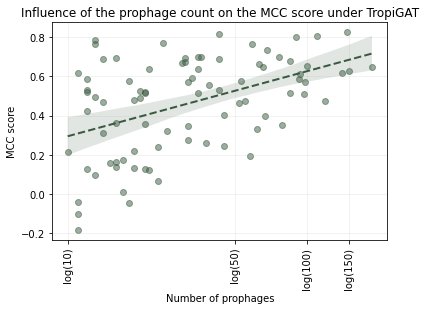

Pearson's r: 0.4626990164443726
P-value: 8.253858940779505e-06


In [28]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr  # Import for Pearson correlation

path_panels = "/media/concha-eloko/Linux/papers/PPT/reviewed_new_figures/panels"

df = pd.DataFrame(data_scatter_tropigat, columns=['n_prophages', 'MCC'])
df['log_Number of prophages'] = np.log(df['n_prophages'])

# Calculate Pearson correlation
correlation, p_value = pearsonr(df['log_Number of prophages'], df['MCC'])


# Draw the regression plot
ax = sns.regplot(x="log_Number of prophages", y="MCC", data=df, color="#3A5A40", scatter_kws={'alpha': 0.5}, line_kws={'linewidth': 2, 'linestyle': '--'})

# Add correlation and p-value to the plot
correlation_str = f"Pearson's r = {correlation:.2f}"
p_value_str = f"p-value = {p_value:.3f}"

#ax.text(0.05, 0.9, equation, transform=ax.transAxes, fontsize=10, color="black")
#ax.text(0.05, 0.85, r_squared, transform=ax.transAxes, fontsize=10, color="black")
#ax.text(0.05, 0.8, p_value_str, transform=ax.transAxes, fontsize=10, color="black")

# Set the desired x-axis ticks and labels
desired_ticks = [np.log(10), np.log(50), np.log(100), np.log(150)]
desired_labels = ["log(10)", "log(50)", "log(100)", "log(150)"]

plt.xticks(desired_ticks, desired_labels, rotation=90)  # Set ticks and labels

plt.grid(True, alpha=0.2, linestyle='-')

plt.xlabel('Number of prophages')
plt.ylabel('MCC score')
plt.title('Influence of the prophage count on the MCC score under TropiGAT')

plt.savefig(f'{path_panels}/scatter_plot.TropiGAT.review.svg', format="svg", transparent=True)

plt.show()


print(f"Pearson's r: {correlation}")
print(f"P-value: {p_value}")

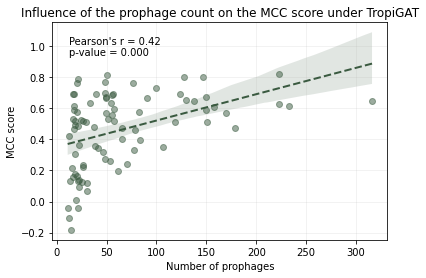

Pearson's r: 0.4245252817811288
P-value: 5.138116089717563e-05


In [34]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

path_panels = "/media/concha-eloko/Linux/papers/PPT/reviewed_new_figures/panels"
plt.figure(figsize=(6, 4)) 

df = pd.DataFrame(data_scatter_tropigat, columns=['clean_n_prophages', 'MCC'])

# Calculate Pearson correlation (using the original n_prophages)
correlation, p_value = pearsonr(df['clean_n_prophages'], df['MCC'])

# Draw the regression plot (using the original n_prophages)
ax = sns.regplot(x="clean_n_prophages", y="MCC", data=df, color="#3A5A40", scatter_kws={'alpha': 0.5}, line_kws={'linewidth': 2, 'linestyle': '--'})

# Add correlation and p-value to the plot
correlation_str = f"Pearson's r = {correlation:.2f}"
p_value_str = f"p-value = {p_value:.3f}"

ax.text(0.05, 0.9, correlation_str, transform=ax.transAxes, fontsize=10, color="black")
ax.text(0.05, 0.85, p_value_str, transform=ax.transAxes, fontsize=10, color="black")


# Set the desired x-axis ticks and labels (using original values, but you can customize)
# If you want to show actual values on the x-axis rather than log, you don't need log here
# However, if the values are too large or too small, the plot might be unreadable.
# You can customize the ticks and labels, for example, by choosing a subset of values.

# Example of setting ticks at specific values (adapt as needed):
# desired_ticks = [10, 50, 100, 150]  # Example: Set ticks at 10, 50, 100, 150
# plt.xticks(desired_ticks, [str(tick) for tick in desired_ticks], rotation=90) # Convert to strings

plt.grid(True, alpha=0.2, linestyle='-')

plt.xlabel('Number of prophages')
plt.ylabel('MCC score')
plt.title('Influence of the prophage count on the MCC score under TropiGAT')

plt.savefig(f'{path_panels}/scatter_plot.TropiGAT.review_nolog.svg', format="svg", transparent=True)

plt.show()

print(f"Pearson's r: {correlation}")
print(f"P-value: {p_value}")

### Plot training loss: 

In [ ]:
import os

path_metrics = "/media/concha-eloko/Linux/PPT_clean/ficheros_28032023/ensemble_0702_log_files/"
average_metric_df = pd.read_csv(f"/media/concha-eloko/Linux/PPT_clean/ficheros_28032023/Metric_Report.0702.clean.tsv", sep = "\t", header = 0)

def make_table(KL_type) :
    version = average_metric_df[average_metric_df["KL_type"] == KL_type]["model_version"].values[0]
    log_file = f"{path_metrics}/{version}__node_classification.0702.log"
    import pandas as pd
    lines_data = [line for line in open(log_file).read().split("\n") if line[0:6] == "Epoch:" if len(line.split("\t")) == 6] # if len(line.split("\t")) == 6*
    lines_split = [line.split("\t") for line in lines_data]
    df_raw = pd.DataFrame(lines_split , columns = ["Epoch","Train_loss","Test_loss","MCC","AUC","Acc"])
    df = df_raw.applymap(lambda x: float(x.split(":")[1]))
    df.set_index("Epoch", inplace = True)
    return df
    
def plot_loss(df) : 
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['Train_loss'], label='train loss', marker='o', linestyle='-', color ="red")
    plt.plot(df.index, df['Test_loss'], label='test loss', marker='s', linestyle='--', color = "blue")
    plt.title('Loss over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)   
    plt.show()  

def plot_and_save(KL_type) :
    df = make_table(KL_type)
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['Train_loss'], label='train loss', marker='o', linestyle='-', color ="#8d0801ff")
    plt.plot(df.index, df['Test_loss'], label='test loss', marker='s', linestyle='--', color = "#c6aa58ff")
    plt.title(f'Loss during the training of TropiGAT for {KL_type}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)   
    path_folder = "/media/concha-eloko/Linux/papers/PPT/loss_plots"
    plt.savefig(f'{path_folder}/{KL_type}.losses_plot.TorpiGAT.svg',format = "svg", transparent = True)  